# **Labeling**

# Load Data

In [93]:
import pandas as pd

df=pd.read_csv(r'datapro.csv')

In [95]:
data=pd.DataFrame(df['stemming'])
data.head()

,stemming
0,kayak kopi kenang janji_jiwa
1,lanjut janji_jiwa stay hungry tau
2,hari kopi nya caramel macchiato janji_jiwa
3,janji_jiwa seblak aesthetic
4,banyak engga suka janji_jiwa padahal favorit i...


In [97]:
import re

def preprocess_text(text):
    # Pastikan hanya tipe data string yang diproses
    if isinstance(text, str):
        text = re.sub(r'janji jiwa', 'janji_jiwa', text, flags=re.IGNORECASE)
    return text

# Terapkan fungsi pada kolom 'full_text'
data['stemming'] = data['stemming'].apply(preprocess_text)


In [99]:
data.head()

,stemming
0,kayak kopi kenang janji_jiwa
1,lanjut janji_jiwa stay hungry tau
2,hari kopi nya caramel macchiato janji_jiwa
3,janji_jiwa seblak aesthetic
4,banyak engga suka janji_jiwa padahal favorit i...


In [101]:
print(data['stemming'].isnull().sum())  # Mengecek jumlah nilai NaN

491


In [103]:
# Menghapus baris dengan NaN di kolom 'stemming'
dfa=data.dropna(subset=['stemming'])

# Mengecek apakah ada baris yang memiliki NaN di kolom 'stemming' setelah dihapus
print(f'Jumlah baris setelah menghapus NaN di kolom "stemming": {dfa.shape[0]}')

Jumlah baris setelah menghapus NaN di kolom "stemming": 13734


In [105]:
print(dfa['stemming'].isnull().sum())  # Mengecek jumlah nilai NaN

0


# Inset Lexicon

In [108]:
import pandas as pd

# Fungsi untuk memuat lexicon (positif dan negatif)
def load_lexicon(file_path):
    lexicon = pd.read_csv(file_path, sep='\t', header=0, names=["word", "weight"])
    lexicon['weight'] = pd.to_numeric(lexicon['weight'], errors='coerce').fillna(0)
    lexicon_dict = dict(zip(lexicon['word'].str.lower(), lexicon['weight']))
    return lexicon_dict

# Fungsi untuk menghitung skor sentimen berdasarkan lexicon positif dan negatif
def label_sentiment(text, positive_lexicon, negative_lexicon):
    words = text.split()  # Pisahkan kalimat menjadi kata-kata
    sentiment_score = 0  # Inisialisasi skor sentimen
    word_weights = []  # List untuk menyimpan bobot tiap kata

    # Cek setiap kata dalam kalimat
    for word in words:
        word = word.lower()
        if word in positive_lexicon:
            weight = positive_lexicon[word]
        elif word in negative_lexicon:
            weight = negative_lexicon[word]
        else:
            weight = 0
        sentiment_score += weight
        word_weights.append((weight))

    # Tentukan label sentimen
    if sentiment_score > 0:
        label = 'positive'
    elif sentiment_score < 0:
        label = 'negative'
    else:
        label = 'neutral'  # Menambahkan label netral jika skor sama dengan nol
    
    return label, sentiment_score, word_weights

# Memuat lexicon positif dan negatif (pastikan file berada di folder yang sama)
positive_lexicon = load_lexicon('positive.tsv')  # Gunakan nama file lexicon positif
negative_lexicon = load_lexicon('negative.tsv')  # Gunakan nama file lexicon negatif

# Ubah data menjadi DataFrame
df = pd.DataFrame(dfa)

# Terapkan proses labeling sentimen pada setiap kalimat dan ekstrak informasi tambahan
df[['label', 'total_weight', 'word_weights']] = dfa['stemming'].apply(
    lambda x: pd.Series(label_sentiment(x, positive_lexicon, negative_lexicon))
)

In [109]:
df.head(20)

,stemming,label,total_weight,word_weights
0,kayak kopi kenang janji_jiwa,neutral,0,"[-3, 0, 3, 0]"
1,lanjut janji_jiwa stay hungry tau,positive,4,"[2, 0, 0, 0, 2]"
2,hari kopi nya caramel macchiato janji_jiwa,neutral,0,"[0, 0, 0, 0, 0, 0]"
3,janji_jiwa seblak aesthetic,neutral,0,"[0, 0, 0]"
4,banyak engga suka janji_jiwa padahal favorit i...,positive,19,"[3, 0, 3, 0, 0, 5, 0, 0, 0, 3, 0, 0, 0, 5, 0]"
5,halo warga magelang shoes and care open recrui...,neutral,0,"[1, 0, 0, 0, 0, 2, -3, 0]"
6,cari store manager shoe technician kirim cv la...,neutral,0,"[-3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,..."
7,janji_jiwa,neutral,0,[0]
8,kopi susu sahabat janji_jiwa gila enak banget ...,positive,25,"[0, 0, 4, 0, 3, 5, 1, 0, 5, 1, 0, 3, 3]"
9,habis beberes kamar baru sadar nyata kumpul to...,positive,10,"[3, 0, 0, 0, 2, 4, 0, 0, 0, 3, 1, -3]"


## Count Label

In [113]:
# Hitung jumlah sentimen positif dan negatif
sentiment_counts = df['label'].value_counts()

# Tampilkan hasil
print(sentiment_counts)

label
positive    8858
neutral     2628
negative    2248
Name: count, dtype: int64


## Cek NaN Value

In [116]:
print(df['label'].isnull().sum())  # Mengecek jumlah nilai NaN

0


In [118]:
# Menghapus baris yang memiliki NaN di kolom 'label'
df = df.dropna(subset=['label'])

# Memeriksa kembali apakah ada NaN di kolom 'label'
print(df['label'].isna().sum())


0


In [120]:
# Hitung jumlah sentimen positif dan negatif
sentiment_counts = df['label'].value_counts()

# Tampilkan hasil
print(sentiment_counts)

label
positive    8858
neutral     2628
negative    2248
Name: count, dtype: int64


In [122]:
# Menghapus baris yang memiliki label 'neutral' pada kolom 'label'
df = df[df['label'] != 'neutral']

In [124]:
# Hitung jumlah sentimen positif dan negatif
sentiment_counts = df['label'].value_counts()

# Tampilkan hasil
print(sentiment_counts)

label
positive    8858
negative    2248
Name: count, dtype: int64


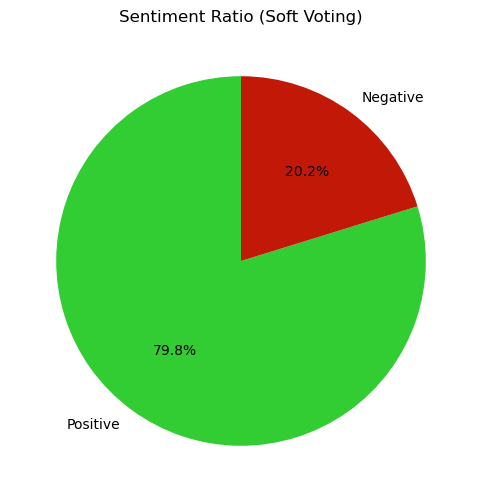

In [126]:
import matplotlib.pyplot as plt

# Data untuk visualisasi
labels = ['Positive', 'Negative']
sizes = [8862, 2246]
colors = ['#32CD32', '#C21807']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Sentiment Ratio (Soft Voting)')
plt.show()


In [128]:
# Menghapus baris yang memiliki NaN di kolom 'label'
df = df.dropna(subset=['label'])

# Memeriksa kembali apakah ada NaN di kolom 'label'
print(df['label'].isna().sum())

0


In [130]:
!pip install wordcloud

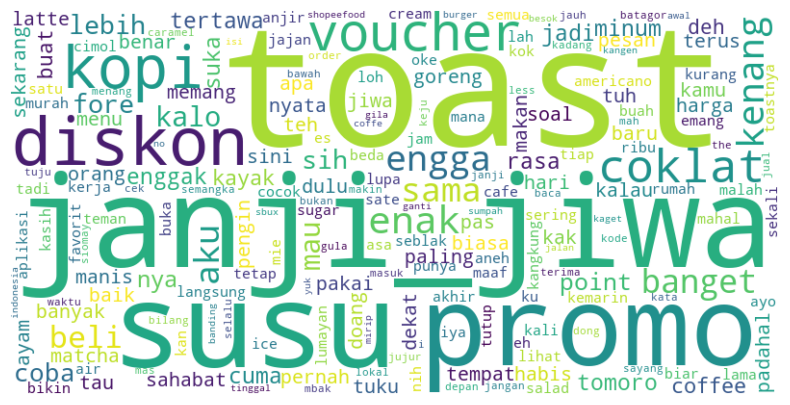

In [208]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize  # Untuk tokenisasi kalimat menjadi kata
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Ambil stopwords dari Sastrawi
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()

# Daftar custom words yang ingin diberikan bobot lebih besar
custom_words = ['toast', 'promo', 'voucher', 'diskon', 'coklat', 'susu']

# Membuat Counter untuk kata-kata positif
positif_words = Counter()

# Tokenisasi dan pembersihan data
for index, row in df.iterrows():
    sentence = row['stemming']
    label = row['label']
    
    # Tokenisasi kalimat menjadi kata
    words = word_tokenize(sentence)
    
    # Hapus stopwords dari kata yang telah di-tokenisasi
    words = [word for word in words if word not in stopwords]
    
    if label == 'positive':  # Pastikan label sesuai dengan data Anda
        for word in words:
            # Berikan bobot pada kata-kata positif
            if word in custom_words:
                positif_words[word] += 15  # Bobot lebih besar untuk kata custom
            else:
                positif_words[word] += 1  # Bobot normal untuk kata positif lainnya

# Membuat WordCloud dari frekuensi kata positif
wordcloud_positif = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
).generate_from_frequencies(positif_words)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.show()


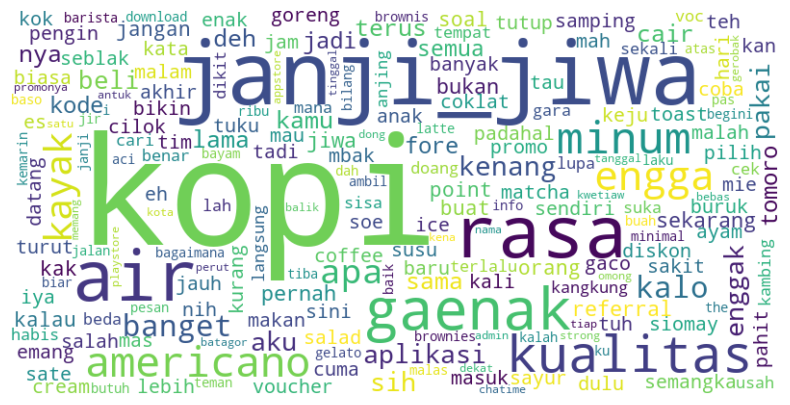

In [174]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize  # Untuk tokenisasi kalimat menjadi kata
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Ambil stopwords dari Sastrawi
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()

# Daftar custom words yang ingin diberikan bobot lebih besar
custom_words = ['americano', 'rasa', 'kopi', 'kualitas', 'air', 'gaenak', 'cair']

# Membuat Counter untuk kata-kata positif
negative_words = Counter()

# Tokenisasi dan pembersihan data
for index, row in df.iterrows():
    sentence = row['stemming']
    label = row['label']
    
    # Tokenisasi kalimat menjadi kata
    words = word_tokenize(sentence)
    
    # Hapus stopwords dari kata yang telah di-tokenisasi
    words = [word for word in words if word not in stopwords]
    
    if label == 'negative':  # Pastikan label sesuai dengan data Anda
        for word in words:
            # Berikan bobot pada kata-kata positif
            if word in custom_words:
                negative_words[word] += 15  # Bobot lebih besar untuk kata custom
            else:
                negative_words[word] += 1  # Bobot normal untuk kata positif lainnya

# Membuat WordCloud dari frekuensi kata negatif
wordcloud_negative = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
).generate_from_frequencies(negative_words)

# Plot WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()


### Save file 

In [176]:
df = pd.DataFrame(df)
df.to_csv("datalabel.csv", index=False)

# **Feature Extraction**

# TF-IDF

In [178]:
import pandas as pd

dfb=pd.read_csv(r'datalabel.csv')

In [180]:
# Hitung jumlah sentimen positif dan negatif
sentiment_counts = dfb['label'].value_counts()

# Tampilkan hasil
print(sentiment_counts)

label
positive    8858
negative    2248
Name: count, dtype: int64


In [182]:
print(dfb['label'].isnull().sum())  # Mengecek jumlah nilai NaN

0


In [184]:
df = dfb.dropna(subset=['stemming'])

In [186]:
print(df['label'].isnull().sum())  # Mengecek jumlah nilai NaN

0


### Create 500 Feature

In [189]:
df1=df

In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer tanpa stopword karena sudah melalui preprocessing
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Stopword dihilangkan di tahap preprocessing

# Melakukan fit_transform pada data teks yang telah melalui preprocessing (stopwords dan stemming)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['stemming'])

# Mengonversi hasil TF-IDF menjadi DataFrame agar lebih mudah dibaca
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil TF-IDF ke dalam DataFrame asli
data_tfidf1 = pd.concat([df1, tfidf_df], axis=1)

In [193]:
data_tfidf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11106 entries, 0 to 11105
Columns: 504 entries, stemming to zonauang
dtypes: float64(500), int64(1), object(3)
memory usage: 42.7+ MB


In [195]:
df1 = pd.DataFrame(data_tfidf1)
df1.to_csv("500feature.csv", index=False)

### Create 5000 Feature

In [50]:
df3=df

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer tanpa stopword karena sudah melalui preprocessing
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Stopword dihilangkan di tahap preprocessing

# Melakukan fit_transform pada data teks yang telah melalui preprocessing (stopwords dan stemming)
tfidf_matrix = tfidf_vectorizer.fit_transform(df3['stemming'])

# Mengonversi hasil TF-IDF menjadi DataFrame agar lebih mudah dibaca
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Gabungkan hasil TF-IDF ke dalam DataFrame asli
data_tfidf2 = pd.concat([df3, tfidf_df], axis=1)

In [52]:
data_tfidf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11108 entries, 0 to 11107
Columns: 504 entries, stemming to zonauang
dtypes: float64(500), int64(1), object(3)
memory usage: 42.7+ MB


In [53]:
df2 = pd.DataFrame(data_tfidf2)
df2.to_csv("5000feature.csv", index=False)